In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array =cv2.imread ("yawn_dataset/normalMouth/1.jpg", cv2.IMREAD_GRAYSCALE)

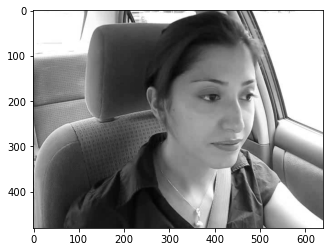

In [3]:
plt.imshow(img_array, cmap="gray")

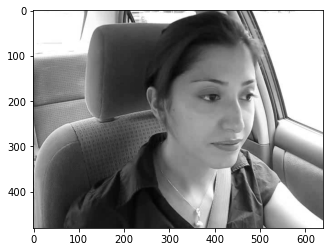

In [3]:
DataDirectory = "yawn_dataset/"
Classes = ["normalMouth", "yawnMouth"]
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

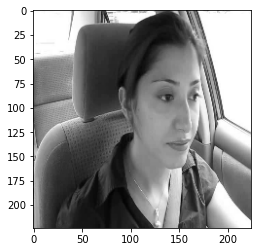

In [4]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [7]:
create_training_data()

In [8]:
print(len(training_data))

1448


In [9]:
import random

random.shuffle(training_data)   #shuffle to prevent overfitting

In [10]:
a = []
b = []

for features, label in training_data:
    a.append(features)
    b.append(label)
    
A = np.array(a).reshape(-1, img_size, img_size, 3)

In [11]:
A.shape

(1448, 224, 224, 3)

In [12]:
# normalise the data
A = A/255.0

In [13]:
B = np.array(b)

In [14]:
import pickle

pickle_out = open("a.pickle", "wb")
pickle.dump(a, pickle_out)
pickle_out.close()

pickle_out = open("b.pickle", "wb")
pickle.dump(b, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("a.pickle", "rb")
a = pickle.load(pickle_in)

pickle_in = open("b.pickle", "rb")
b = pickle.load(pickle_in)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model_m = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model_m.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

## Transfer Learning

In [19]:
base_input = model_m.layers[0].input  ##input

In [20]:
base_output = model_m.layers[-4].output

In [21]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)   ## one node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [22]:
new_model_m = keras.Model(inputs = base_input, outputs = final_output)

In [23]:
new_model_m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## settings for binary classification

In [24]:
new_model_m.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
new_model_m.fit(A, B, epochs = 10, validation_split = 0.1) ## training

Epoch 1/10
41/41 [==============================] - 119s 3s/step - loss: 0.2050 - accuracy: 0.9355 - val_loss: 0.8909 - val_accuracy: 0.8828
Epoch 2/10
41/41 [==============================] - 121s 3s/step - loss: 0.0394 - accuracy: 0.9885 - val_loss: 7.1040e-04 - val_accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 121s 3s/step - loss: 0.0296 - accuracy: 0.9969 - val_loss: 0.2446 - val_accuracy: 0.9655
Epoch 4/10
41/41 [==============================] - 122s 3s/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.2141 - val_accuracy: 0.9724
Epoch 5/10
41/41 [==============================] - 122s 3s/step - loss: 0.0262 - accuracy: 0.9931 - val_loss: 0.0131 - val_accuracy: 0.9931
Epoch 6/10
41/41 [==============================] - 122s 3s/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0219 - val_accuracy: 0.9862
Epoch 7/10
41/41 [==============================] - 120s 3s/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0177 - val_accuracy: 0.9862
Epoch 8/1

In [26]:
new_model_m.save('mouth_model_1.h5')

In [2]:
new_model_m = tf.keras.models.load_model('mouth_model_1.h5') 

## Checking the network for predicitions

In [6]:
img_array = cv2.imread('50.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [7]:
A_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [8]:
A_input.shape

(1, 224, 224, 3)

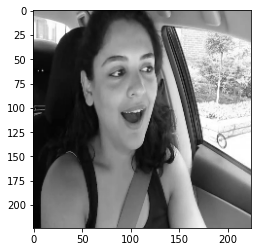

In [9]:
plt.imshow(new_array)

In [10]:
A_input = A_input/255.0

In [11]:
prediction = new_model_m.predict(A_input)

In [12]:
prediction

array([[0.99999905]], dtype=float32)

## Test for unknown image

In [13]:
img = cv2.imread('yawngym.jpg')

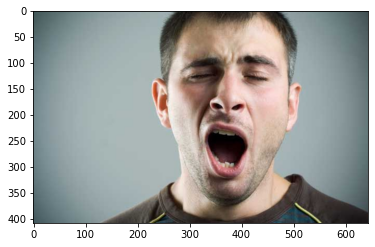

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
final_image = cv2.resize(img, (224,224))
final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
final_image = final_image/255.0

In [16]:
final_image.shape

(1, 224, 224, 3)

In [17]:
new_model_m.predict(final_image)

array([[0.95260924]], dtype=float32)

# Real time video demo

## first detect yawn or not

In [3]:
import winsound
frequency = 1500 # Set Frequency To 1500 Hertz
duration = 1000  # Set Duration To 1000
import cv2
import numpy as np
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    
    final_image = cv2.resize(frame, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model_m.predict(final_image)
    if (Predictions>0.5):
        status = "Yawn"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, 'Fatigue Detected!!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        winsound.Beep(frequency, duration)
    else:
        status = "Normal"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black backgrond rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw rectangle around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    
    # use putText() method for increasing text on video
    
    
    cv2.imshow('Driver Yawning Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyALLWindows()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


KeyboardInterrupt: 